# REASON Radargram Demo

This notebook demonstrates how to use the `reason_pds_review` library to load and visualize REASON partially processed data.

## Setup

First, import the necessary libraries:

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from reason_pds_review import load_ppdp, apply_stacking

# Configure matplotlib for better output
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

## Configuration

Set up paths and processing parameters:

In [9]:
# Path to partially processed data
data_dir = "../../urn-nasa-pds-clipper.rea.partiallyprocessed/DATA/000MGA/2025060T1736"

# Stacking configuration (incoherent averaging)
# Reduces noise and number of pulses for easier visualization
STACKING = {
    'HF': 10,          # 10x stacking for HF channel
    'VHF_POSX': 20,    # 20x stacking for VHF channels
    'VHF_FULL': 20,
    'VHF_NEGX': 20
}

# Channel ordering for subplot layout (left to right, top to bottom)
CHANNEL_ORDER = ['HF', 'VHF_POSX', 'VHF_FULL', 'VHF_NEGX']

## Load Data

Use the `load_ppdp()` function to load all channels from the data directory:

In [10]:
print(f"Loading data from {data_dir}...")
tree = load_ppdp(data_dir)

print("\nData loaded successfully!")
print(f"Available channels: {list(tree.children.keys())}")

Loading data from ../../urn-nasa-pds-clipper.rea.partiallyprocessed/DATA/000MGA/2025060T1736...
Loading HF science data from REA000MGA_2025060T1736_09TCOMBSCI_PPD020.BIN...
Loading VHF_FULL science data from REA000MGA_2025060T1736_60TFULLSCI_PPD020.BIN...
Loading VHF_NEGX science data from REA000MGA_2025060T1736_60TNEGXSCI_PPD020.BIN...
Loading VHF_POSX science data from REA000MGA_2025060T1736_60TPOSXSCI_PPD020.BIN...
Loading HF engineering data from REA000MGA_2025060T1736_09TCOMBENG_PPD020.TAB...
Loading VHF_FULL engineering data from REA000MGA_2025060T1736_60TFULLENG_PPD020.TAB...
Loading VHF_NEGX engineering data from REA000MGA_2025060T1736_60TNEGXENG_PPD020.TAB...
Loading VHF_POSX engineering data from REA000MGA_2025060T1736_60TPOSXENG_PPD020.TAB...

Loaded 4 channels from 2025060T1736

Data loaded successfully!
Available channels: ['HF', 'VHF_FULL', 'VHF_NEGX', 'VHF_POSX']


## Explore the Data Structure

The data is organized in a hierarchical xarray DataTree:

In [11]:
# Display the full tree structure
tree

<xarray.DataTree>
Group: /
│   Attributes:
│       data_directory:  ../../urn-nasa-pds-clipper.rea.partiallyprocessed/DATA/0...
│       description:     REASON Partially Processed Data
├── Group: /HF
│   ├── Group: /HF/science
│   │       Dimensions:    (slow_time: 9698, fast_time: 964)
│   │       Coordinates:
│   │         * slow_time  (slow_time) int64 78kB 0 1 2 3 4 5 ... 9693 9694 9695 9696 9697
│   │         * fast_time  (fast_time) float64 8kB 0.0 0.8333 1.667 ... 800.8 801.7 802.5
│   │       Data variables:
│   │           complex    (slow_time, fast_time) complex64 75MB (470.27078+1158.5983j) ....
│   │       Attributes:
│   │           channel_name:     HF
│   │           frequency:        9 MHz
│   │           sample_rate_hz:   1200000.0
│   │           description:      HF radar data
│   │           n_slow_time:      9698
│   │           n_fast_time:      964
│   │           fast_time_units:  microseconds
│   │           source_file:      REA000MGA_2025060T1736_09TCOMBSCI_PPD020.BIN
│   └── Group: /HF/engineering
│           Dimensions:                   (slow_time: 9698)
│           Coordinates:
│             * slow_time                 (slow_time) int64 78kB 0 1 2 3 ... 9695 9696 9697
│           Data variables: (12/26)
│               Ephemeris_time            (slow_time) float64 78kB 7.941e+08 ... 7.941e+08
│               SC_clock                  (slow_time) float64 78kB 3.136e+13 ... 3.136e+13
│               UTC_doy                   (slow_time) object 78kB '2025-060T17:56:19.536'...
│               UTC_yymmdd                (slow_time) object 78kB '2025-03-01T17:56:19.53...
│               AID                       (slow_time) object 78kB '0xb0000838' ... '0xb00...
│               BFPQ_block_size           (slow_time) int64 78kB 32 32 32 32 ... 32 32 32 32
│               ...                        ...
│               RX_delay_tracking_offset  (slow_time) int64 78kB 19 18 17 15 ... 14 15 16 17
│               RX_window_length_ticks    (slow_time) int64 78kB 36480 36480 ... 36624 36624
│               RX_window_time            (slow_time) float64 78kB 4.785e+08 ... 4.785e+08
│               Raw_active_mode_length    (slow_time) int64 78kB 889 889 889 ... 893 893 893
│               TX_start_ticks            (slow_time) int64 78kB -255120 -255120 ... -255120
│               VHF_1bit_+-_phase_corr    (slow_time) float64 78kB 0.0 0.0 ... 6.952 6.952
│           Attributes:
│               source_file:  REA000MGA_2025060T1736_09TCOMBENG_PPD020.TAB
│               description:  Engineering data (chirp parameters, telemetry)
├── Group: /VHF_FULL
│   ├── Group: /VHF_FULL/science
│   │       Dimensions:    (slow_time: 38786, fast_time: 9008)
│   │       Coordinates:
│   │         * slow_time  (slow_time) int64 310kB 0 1 2 3 4 ... 38782 38783 38784 38785
│   │         * fast_time  (fast_time) float64 72kB 0.0 0.08333 0.1667 ... 750.4 750.5 750.6
│   │       Data variables:
│   │           complex    (slow_time, fast_time) complex128 6GB (-1-1j) (-1-1j) ... 0j 0j
│   │       Attributes:
│   │           channel_name:     VHF_FULL
│   │           frequency:        60 MHz
│   │           sample_rate_hz:   12000000.0
│   │           description:      FDVHF radar data
│   │           n_slow_time:      38786
│   │           n_fast_time:      9008
│   │           fast_time_units:  microseconds
│   │           source_file:      REA000MGA_2025060T1736_60TFULLSCI_PPD020.BIN
│   └── Group: /VHF_FULL/engineering
│           Dimensions:                   (slow_time: 38786)
│           Coordinates:
│             * slow_time                 (slow_time) int64 310kB 0 1 2 ... 38784 38785
│           Data variables: (12/26)
│               Ephemeris_time            (slow_time) float64 310kB 7.941e+08 ... 7.941e+08
│               SC_clock                  (slow_time) float64 310kB 3.136e+13 ... 3.136e+13
│               UTC_doy                   (slow_time) object 310kB '2025-060T17:56:19.536...
│               UTC_yymmdd            

### Examine HF Channel Data

Let's look at the HF science data in detail:

In [12]:
# Access HF science dataset
hf_science = tree['HF/science'].ds
print(hf_science)

<xarray.DatasetView> Size: 75MB
Dimensions:    (slow_time: 9698, fast_time: 964)
Coordinates:
  * slow_time  (slow_time) int64 78kB 0 1 2 3 4 5 ... 9693 9694 9695 9696 9697
  * fast_time  (fast_time) float64 8kB 0.0 0.8333 1.667 ... 800.8 801.7 802.5
Data variables:
    complex    (slow_time, fast_time) complex64 75MB (470.27078+1158.5983j) ....
Attributes:
    channel_name:     HF
    frequency:        9 MHz
    sample_rate_hz:   1200000.0
    description:      HF radar data
    n_slow_time:      9698
    n_fast_time:      964
    fast_time_units:  microseconds
    source_file:      REA000MGA_2025060T1736_09TCOMBSCI_PPD020.BIN


In [13]:
# Display metadata
print("HF Channel Metadata:")
print(f"  Frequency: {hf_science.attrs['frequency']}")
print(f"  Sample Rate: {hf_science.attrs['sample_rate_hz']/1e6:.1f} MHz")
print(f"  Description: {hf_science.attrs['description']}")
print(f"  Data Shape: {hf_science.sizes}")
print(f"  Fast Time Range: 0 to {float(hf_science.coords['fast_time'].max()):.2f} μs")

HF Channel Metadata:
  Frequency: 9 MHz
  Sample Rate: 1.2 MHz
  Description: HF radar data
  Data Shape: Frozen({'slow_time': 9698, 'fast_time': 964})
  Fast Time Range: 0 to 802.50 μs


### Examine Engineering Data

Check the chirp parameters from the engineering data:

In [27]:
# Access HF engineering dataset
hf_eng = tree['HF/engineering'].ds

hf_eng

<xarray.DatasetView> Size: 2MB
Dimensions:                   (slow_time: 9698)
Coordinates:
  * slow_time                 (slow_time) int64 78kB 0 1 2 3 ... 9695 9696 9697
Data variables: (12/26)
    Ephemeris_time            (slow_time) float64 78kB 7.941e+08 ... 7.941e+08
    SC_clock                  (slow_time) float64 78kB 3.136e+13 ... 3.136e+13
    UTC_doy                   (slow_time) object 78kB '2025-060T17:56:19.536'...
    UTC_yymmdd                (slow_time) object 78kB '2025-03-01T17:56:19.53...
    AID                       (slow_time) object 78kB '0xb0000838' ... '0xb00...
    BFPQ_block_size           (slow_time) int64 78kB 32 32 32 32 ... 32 32 32 32
    ...                        ...
    RX_delay_tracking_offset  (slow_time) int64 78kB 19 18 17 15 ... 14 15 16 17
    RX_window_length_ticks    (slow_time) int64 78kB 36480 36480 ... 36624 36624
    RX_window_time            (slow_time) float64 78kB 4.785e+08 ... 4.785e+08
    Raw_active_mode_length    (slow_time) int64 78kB 889 889 889 ... 893 893 893
    TX_start_ticks            (slow_time) int64 78kB -255120 -255120 ... -255120
    VHF_1bit_+-_phase_corr    (slow_time) float64 78kB 0.0 0.0 ... 6.952 6.952
Attributes:
    source_file:  REA000MGA_2025060T1736_09TCOMBENG_PPD020.TAB
    description:  Engineering data (chirp parameters, telemetry)

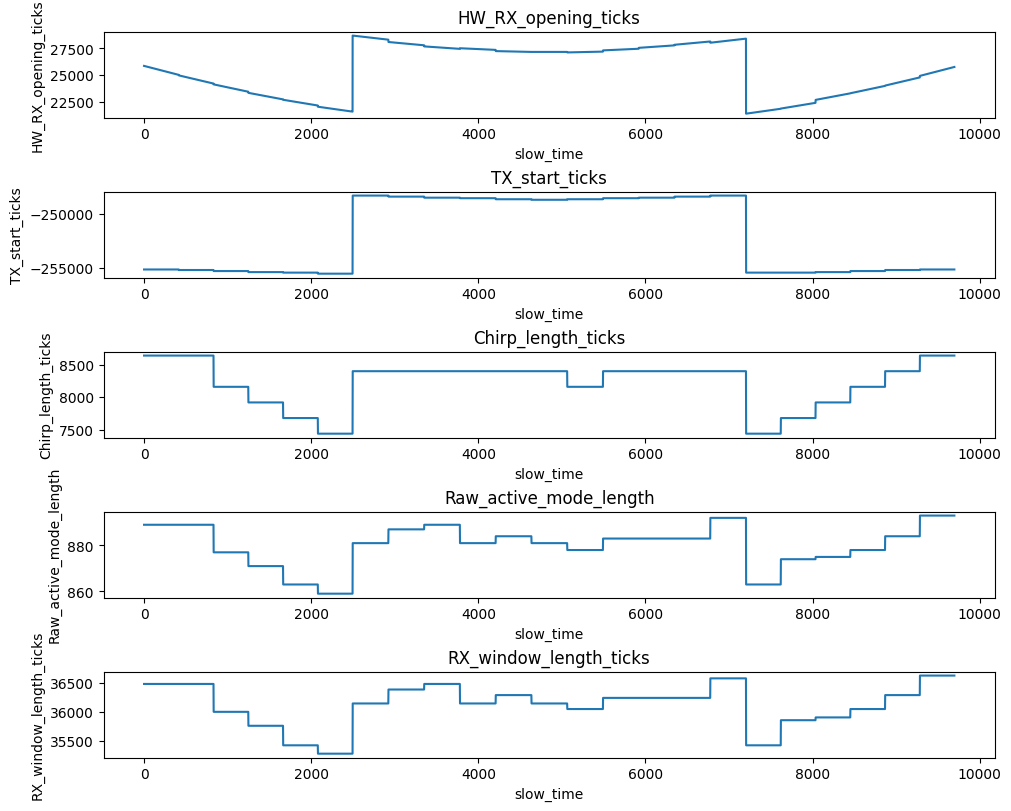

In [30]:
# keys_to_plot = ['Chirp_start_frequency', 'Chirp_end_frequency', 'Doppler_frequency',
#                 'Dwell_ID', 'RX_window_length_ticks']
keys_to_plot = ['HW_RX_opening_ticks', 'TX_start_ticks', 'Chirp_length_ticks',
                'Raw_active_mode_length', 'RX_window_length_ticks']
fig, axs = plt.subplots(len(keys_to_plot), 1, figsize=(10, 8), constrained_layout=True)
for ax, key in zip(axs, keys_to_plot):
    hf_eng[key].plot(ax=ax)
    ax.set_title(key)
plt.show()

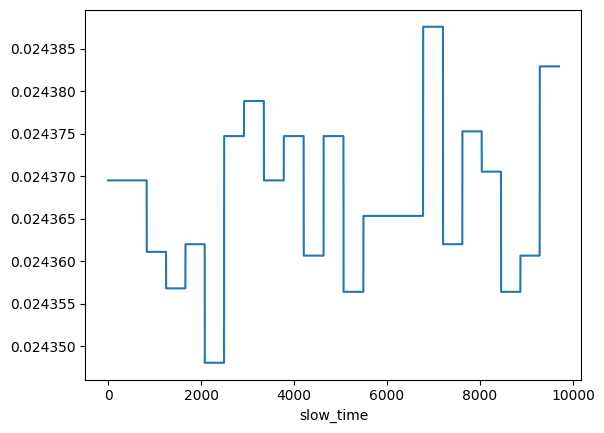

In [40]:
#tmp = hf_eng['HW_RX_opening_ticks'] - hf_eng['TX_start_ticks'] + hf_eng['Chirp_length_ticks']
tmp = hf_eng['Raw_active_mode_length'] / hf_eng['RX_window_length_ticks']
tmp.plot()